<a href="https://colab.research.google.com/github/ZeusKwon/CSAI_assignment/blob/main/n234a_%EC%8A%A4%ED%84%B0%EB%94%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## *DATA SCIENCE / SECTION 2 / SPRINT 3 / NOTE 4*

# 📝 Assignment
---

# Interpreting ML Model

### 1)


In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 

In [ ]:
! pip install shap
! pip install pdpbox

In [ ]:
X_train.shape,X_test.shape

((404, 13), (102, 13))

In [ ]:
### (제출폼 과제) 이곳에서 과제를 진행해 주세요 ###
import sklearn
import xgboost
import shap
from sklearn.model_selection import train_test_split

shap.initjs();

df, target = shap.datasets.boston()
X_train,X_test,y_train,y_test = train_test_split(df, target, test_size=0.2, random_state=2)

model = xgboost.XGBRegressor().fit(X_train, y_train)
X = model.fit(X_train, y_train)
### Draw PDP plots ###


[06:59:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:59:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# dpi(dots per inch) 수치를 조정해 이미지 화질을 조정 할 수 있습니다
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

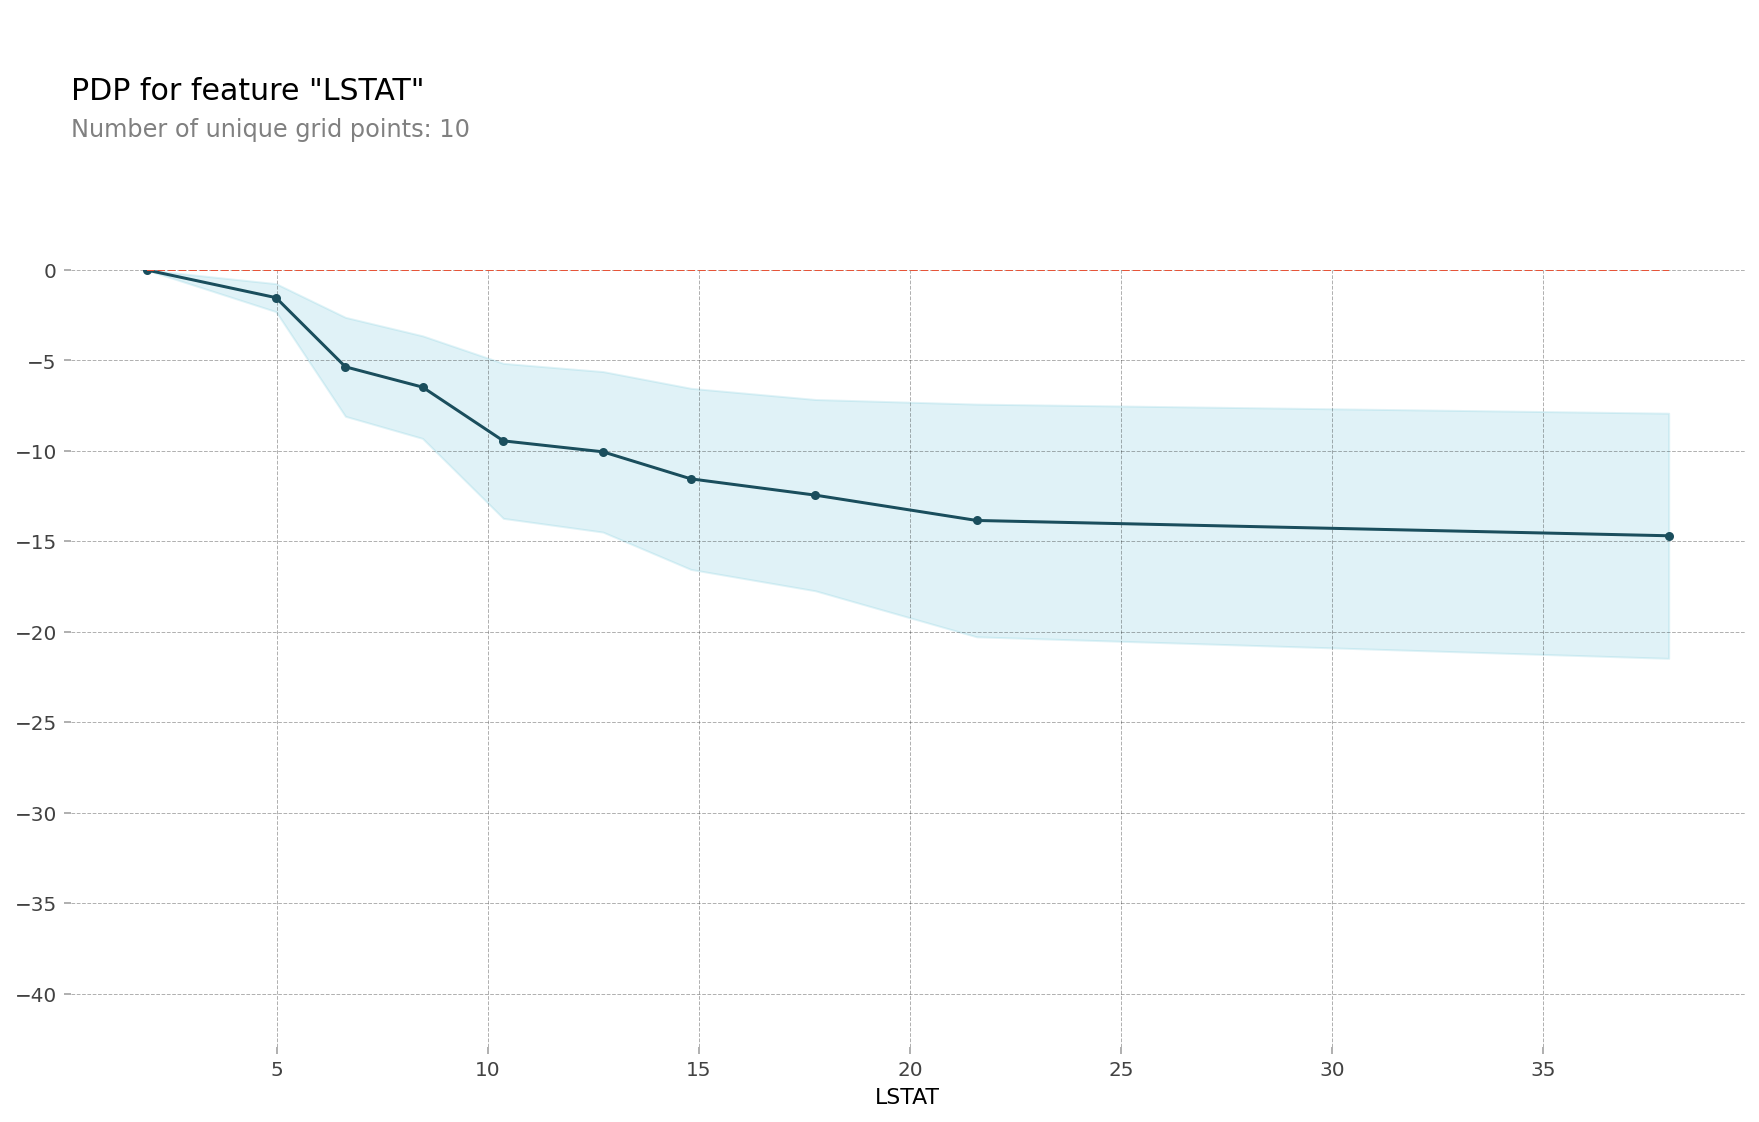

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'LSTAT'

isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile' # default='percentile', or 'equal'
    # num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

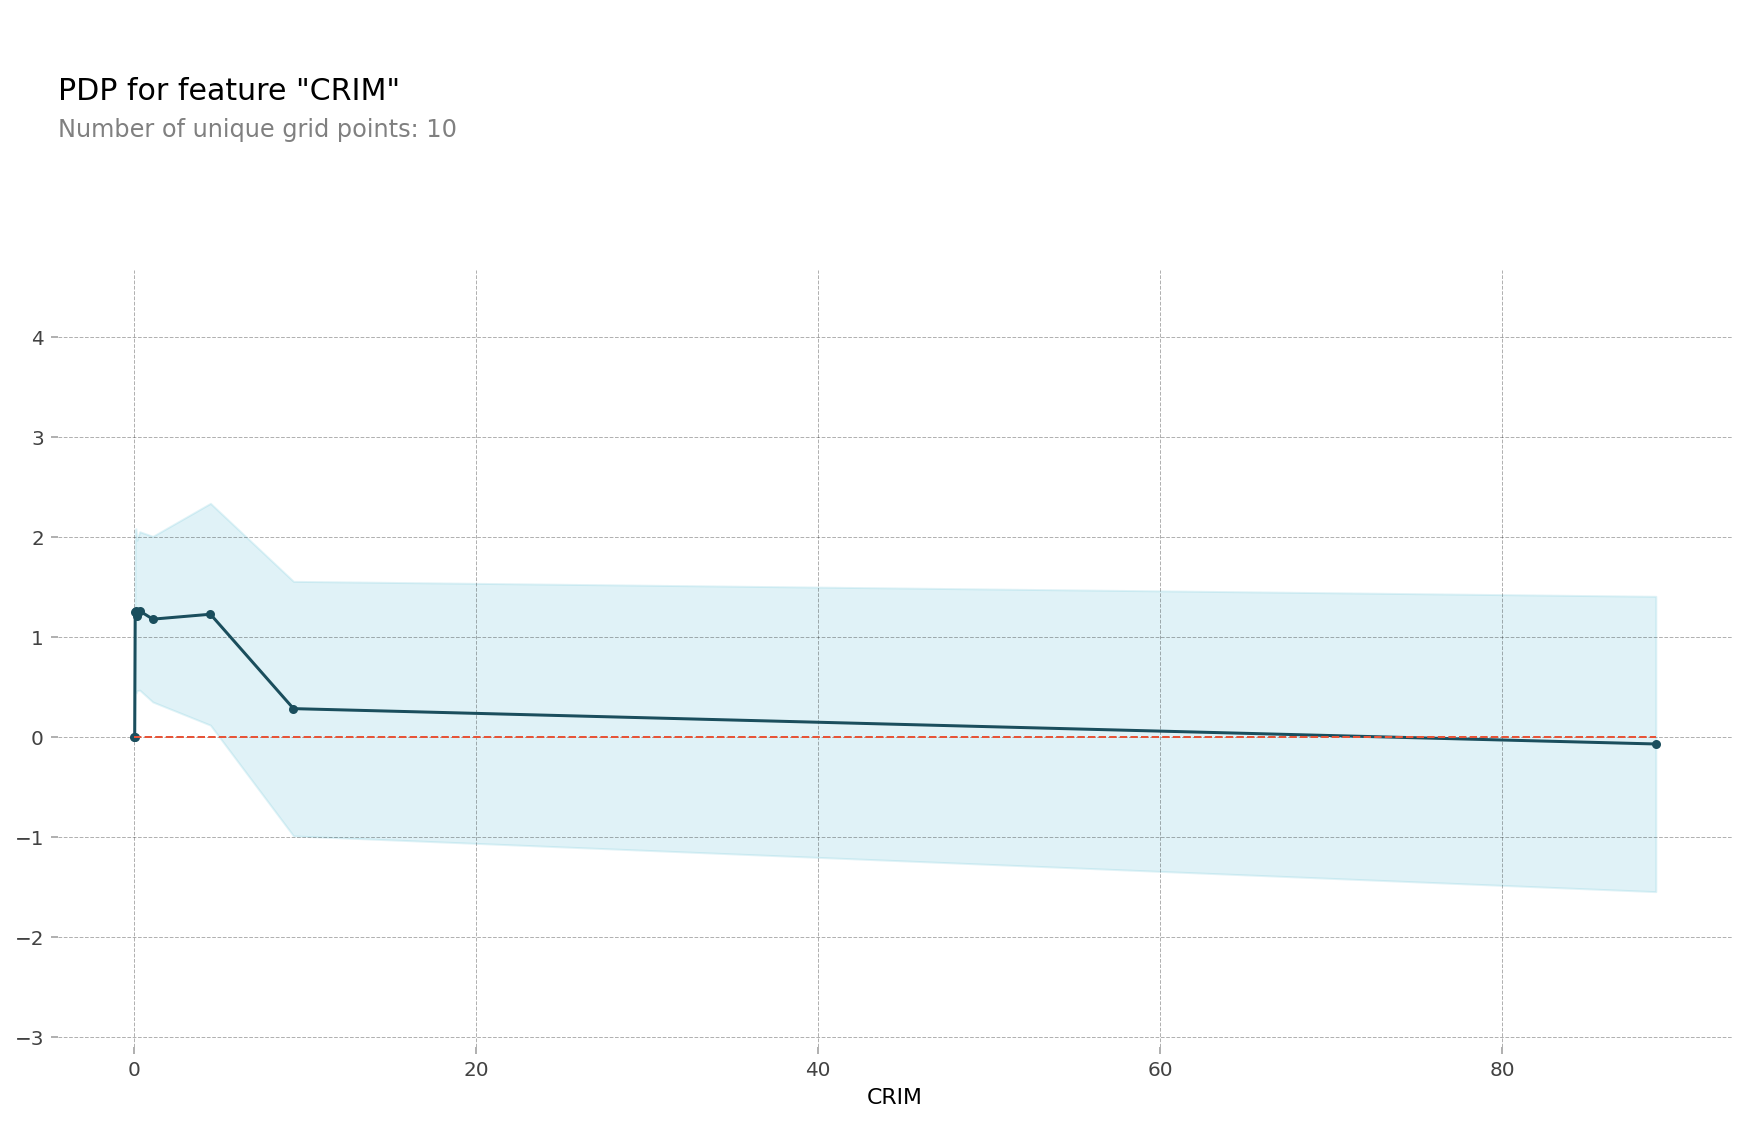

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'CRIM'

isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile' # default='percentile', or 'equal'
    # num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

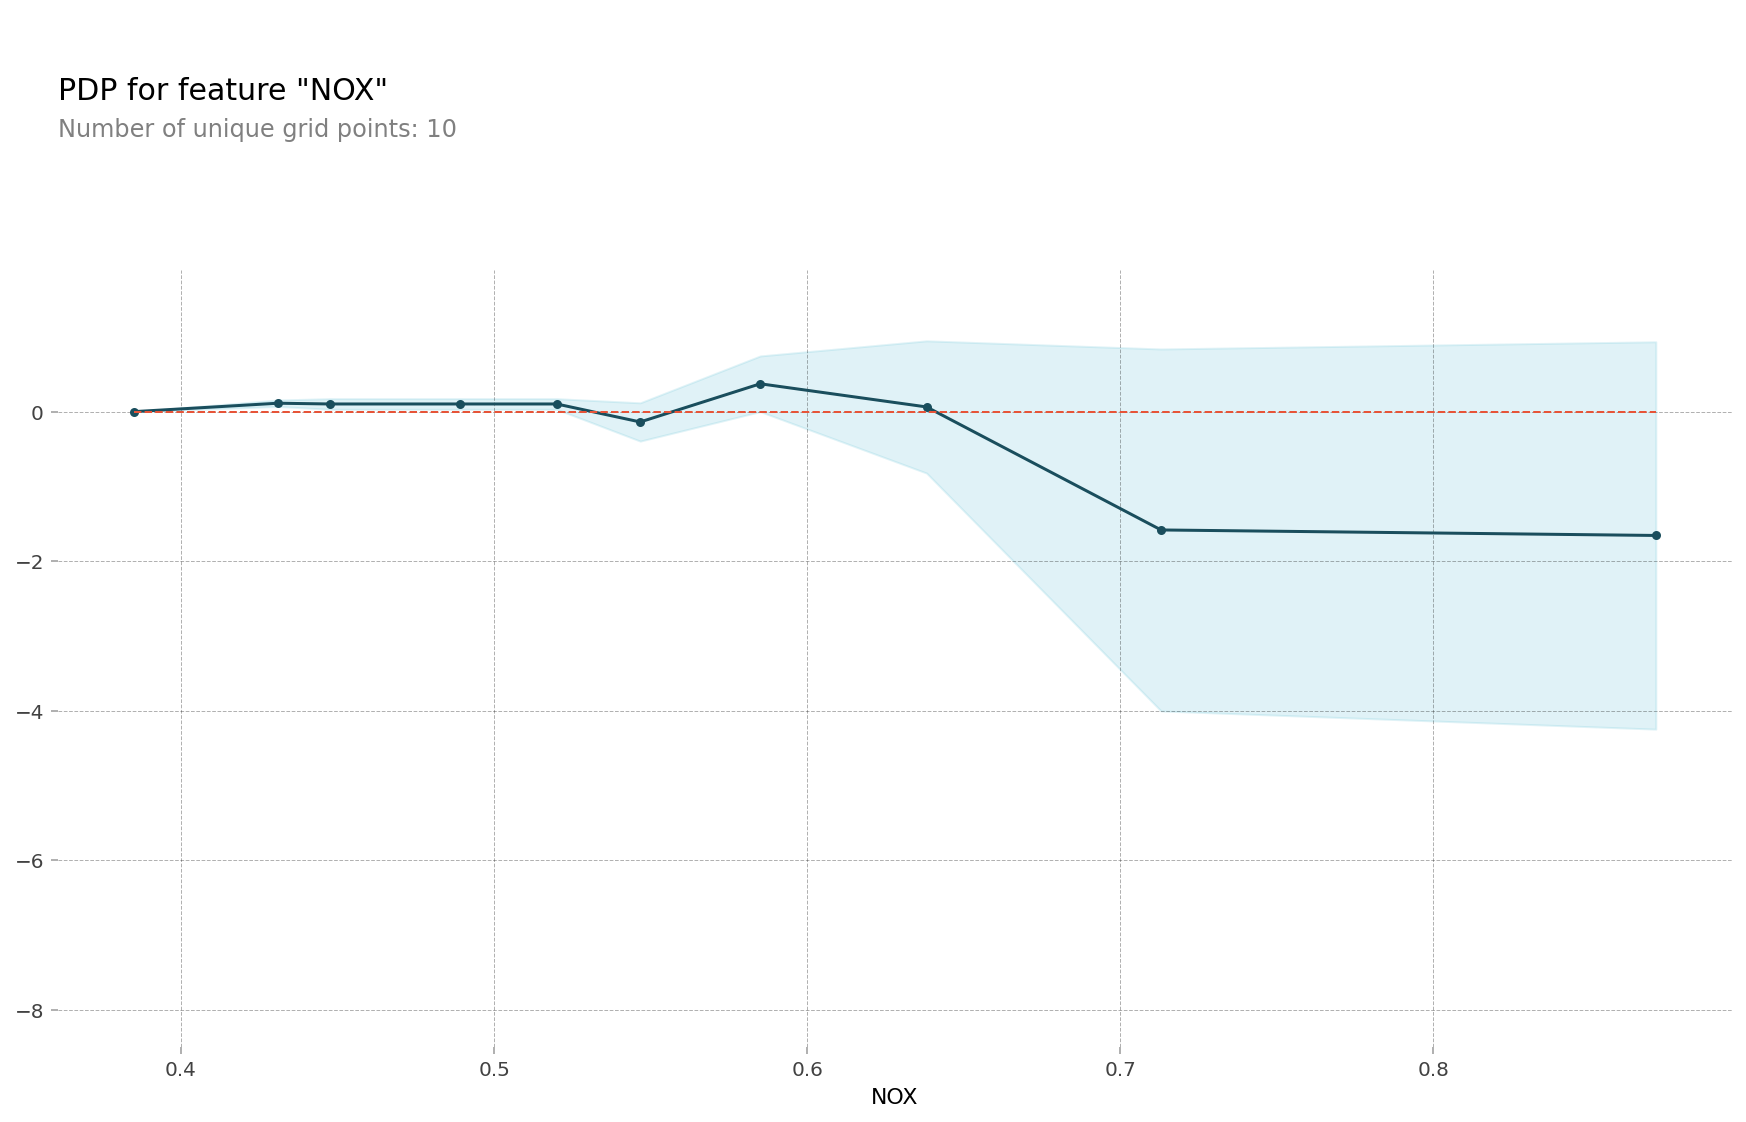

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'NOX'

isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile' # default='percentile', or 'equal'
    # num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

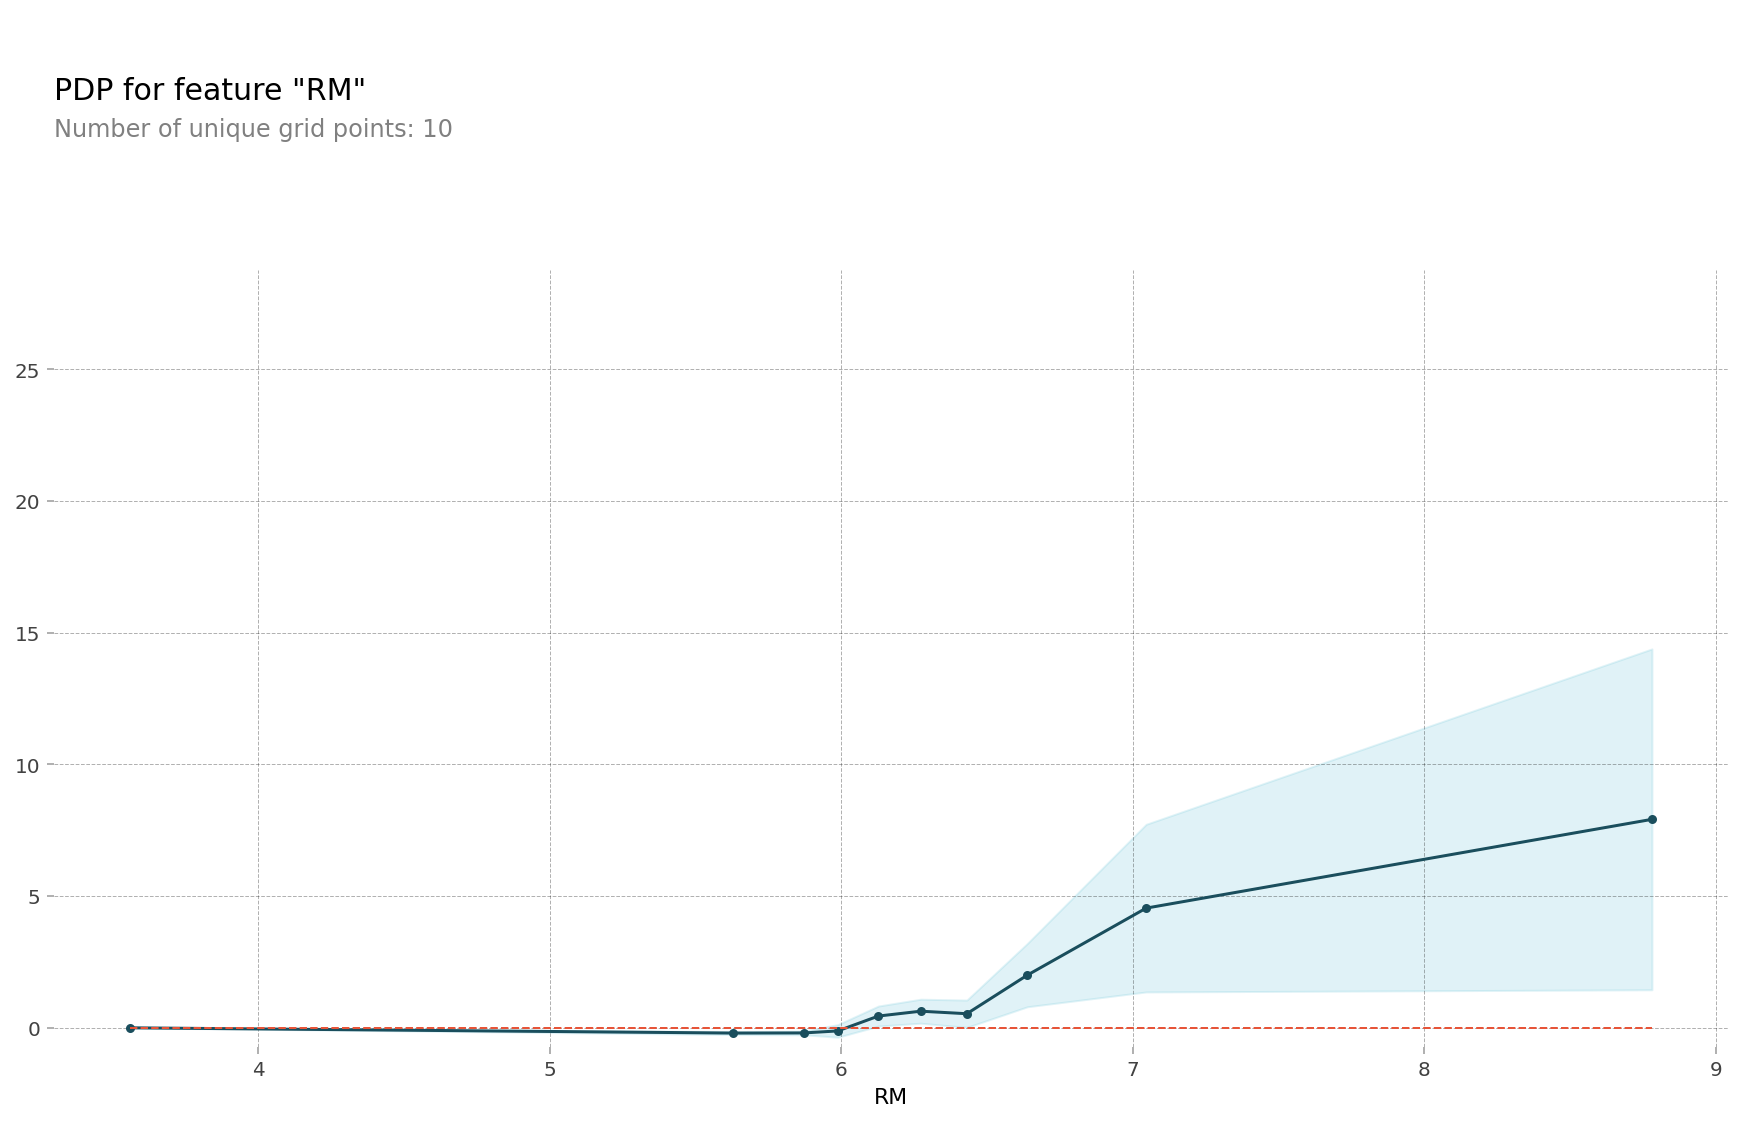

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'RM'

isolated = pdp_isolate(
    model=model, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile' # default='percentile', or 'equal'
    # num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

### 2)
    - 1. force_plot을 그려보면 CRIM은 항상 가격을 낮추는 영향을 준다.(X)
    - 2. SHAP의 summary_plot을 사용하면 permutation importance를 구할 수 있다.(X)
    - 3. SHAP summary_plot을 그려보면 (조건: X_train, plot_type='bar') LSTAT이 가장 영향력이 큰 특성으로 보인다.(O)
    - 4. 모델의 feature importance(model.feature_importances_)를 구하면 가장 영향력이 큰 특성이 RM임을 알 수있다.(X)


In [ ]:
### 이곳에서 과제를 진행해 주세요 ###

In [ ]:
### (제출폼 과제) 이곳에서 과제를 진행해 주세요 ###
explainer = shap.TreeExplainer(model)

### Draw SHAP plots ###

In [ ]:
import shap

row = X_test.iloc[[1]]  # 중첩 brackets을 사용하면 결과물이 DataFrame입니다

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(row)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values,
    features=row
)

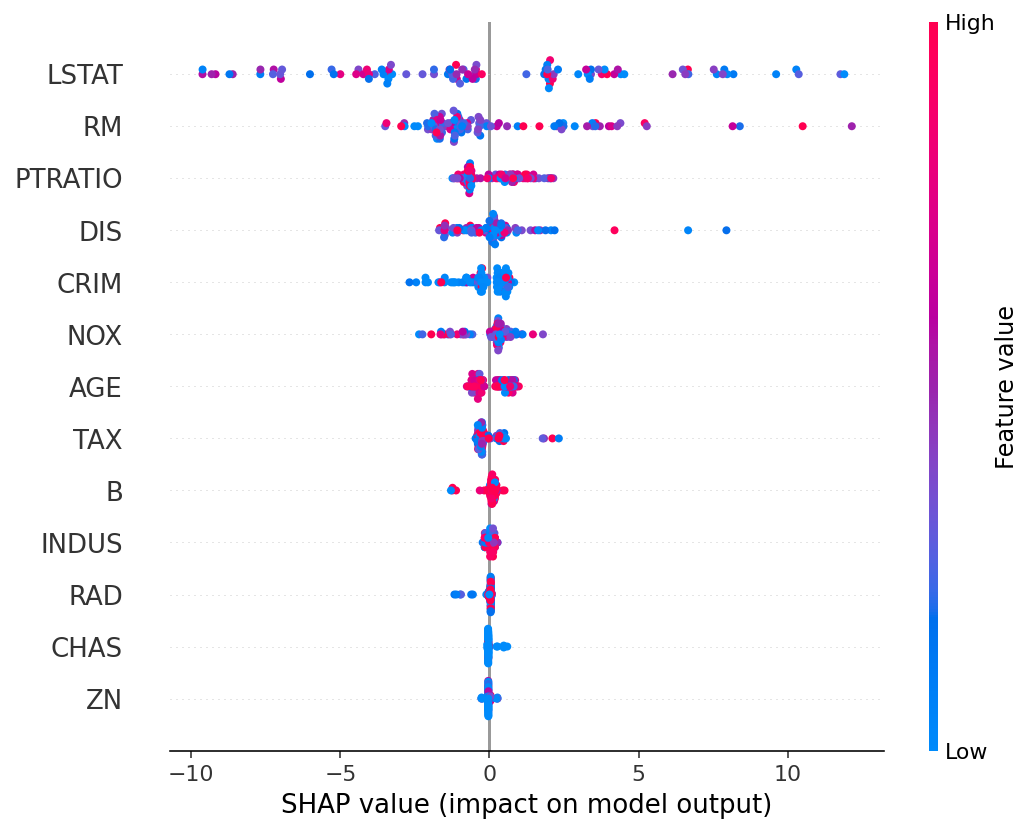

In [ ]:
shap_values = explainer.shap_values(X_test.iloc[:100])
shap.summary_plot(shap_values, X_train.iloc[:100])

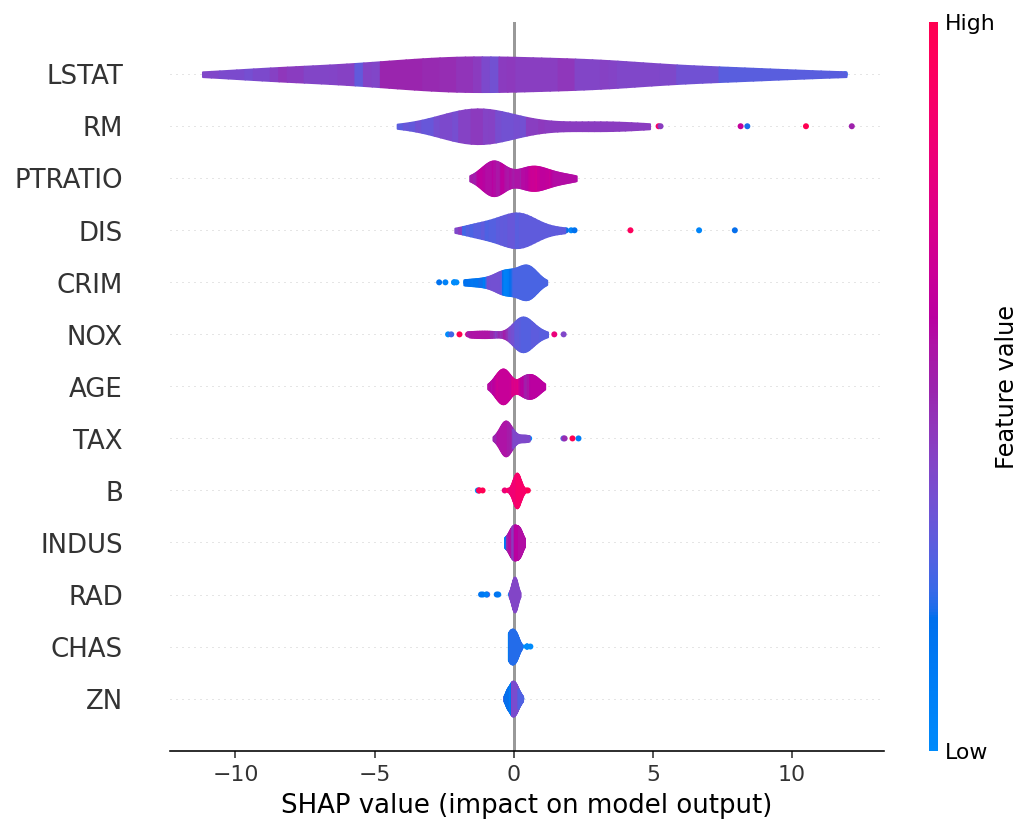

In [ ]:

shap.summary_plot(shap_values, X_train.iloc[:100], plot_type="violin")

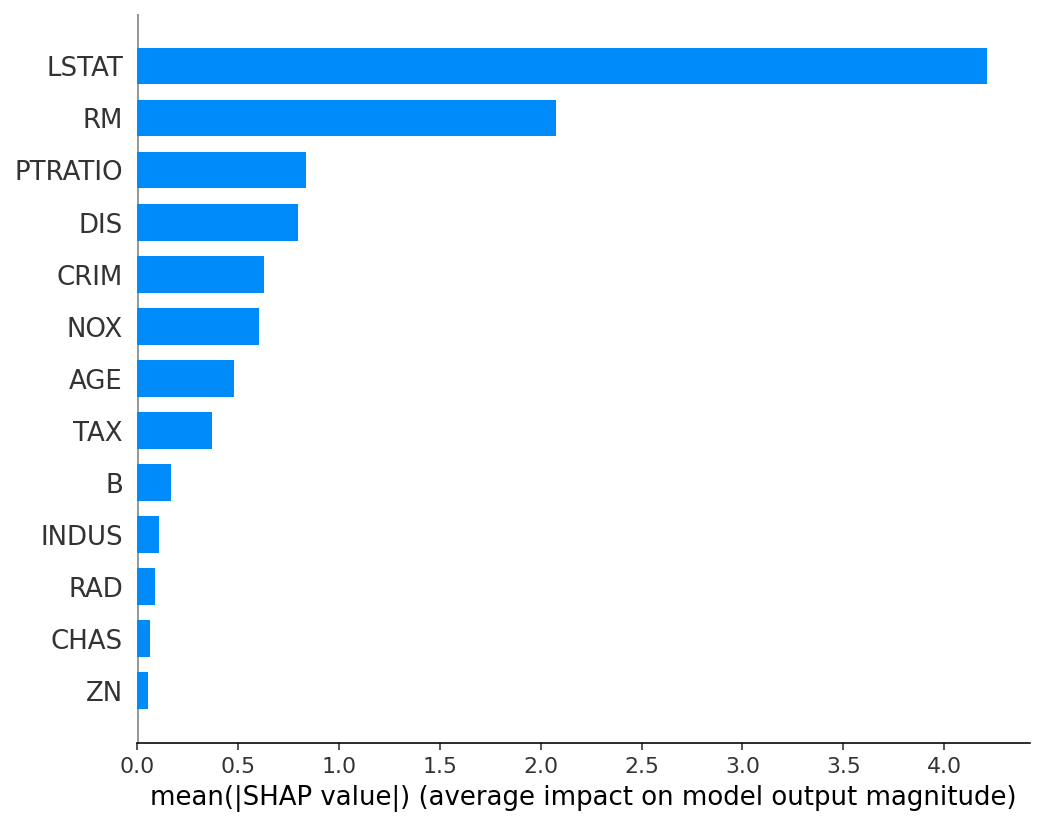

In [ ]:
shap.summary_plot(shap_values, X_train.iloc[:300], plot_type="bar")

In [ ]:
import pandas as pd
print(model.feature_importances_)
feature_list = pd.concat([pd.Series(X_train.columns), pd.Series(model.feature_importances_)], axis=1)
feature_list.columns = ['features_name', 'importance']
feature_list.sort_values("importance", ascending =False)[:8]

[0.04035415 0.00518663 0.01150439 0.01003561 0.04434089 0.15212078
 0.00871318 0.04446699 0.01239416 0.02528549 0.04181865 0.01266525
 0.5911138 ]


,features_name,importance
12,LSTAT,0.591114
5,RM,0.152121
7,DIS,0.044467
4,NOX,0.044341
10,PTRATIO,0.041819
0,CRIM,0.040354
9,TAX,0.025285
11,B,0.012665


## 🔥 도전과제

### 3) 지속적으로 포트폴리오 프로젝트를 수행하세요
- 지속적으로 데이터를 랭글링 하고 추가적인 시각화 결과를 만드세요

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###